Enter your allergies (separated by commas):  fish


Your Allergies: ['fish']
PREDICTIONS BASED ON PICTURES UPLOADED
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step
Predicted Food: sushi
Ingredients: rice, fish,fish (various types), seaweed, soy sauce, wasabi
Nutritional Values:
protein: 2.92
calcium: 0.006
fat: 0.67
carbohydrates: 18.4
vitamins: 0.0009
Allergens Found: fish


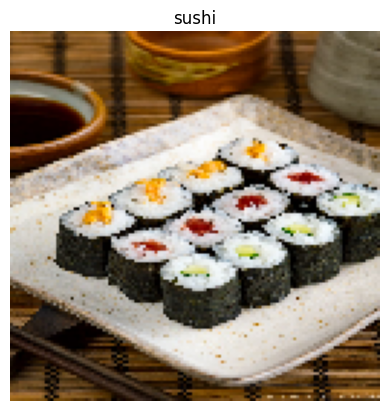

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model

nutrition_data = pd.read_csv('nutrition_infor.csv')

def create_foodlist(path):
    list_ = list()
    for root, dirs, files in os.walk(path, topdown=False):
      for name in dirs:
        list_.append(name)
    return list_  
    
my_model = load_model('model_trained.keras', compile = False)
food_list = create_foodlist("food-101/images")

# Load the ingredients dataset
ingredients_data = pd.read_csv('ingredients.csv')
ingredients_dict = {}
for index, row in ingredients_data.iterrows():
    ingredients_dict[row['food_item']] = row['ingredients']

# Create a dictionary to map food names to their nutritional values
nutrition_dict = {}
for index, row in nutrition_data.iterrows():
    nutrition_dict[row['name']] = {
        'protein': row['protein'],
        'calcium': row['calcium'],
        'fat': row['fat'],
        'carbohydrates': row['carbohydrates'],
        'vitamins': row['vitamins']
    }

# Modify the predict_class function to display nutritional values and check for allergies
def predict_class(model, images, allergies=[], show=True):
    for img in images:
        img = image.load_img(img, target_size=(128, 128))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img /= 255.

        pred = model.predict(img)
        index = np.argmax(pred)
        food_list.sort()
        pred_value = food_list[index]

        # Lookup ingredients for the predicted food item
        ingredients = ingredients_dict.get(pred_value, "Not Available")

        nutritional_values = nutrition_dict.get(pred_value, {})
        print("Predicted Food:", pred_value)
        #print("Ingredients:", ingredients)
        print("Nutritional Values:")
        for key, value in nutritional_values.items():
            print(f"{key}: {value}")

        # Check for allergies
        allergens = [allergy.lower() for allergy in allergies]
        found_allergens = [allergen for allergen in allergens if allergen in ingredients.lower()]
        contains_allergen = any(allergen in ingredients.lower() for allergen in allergens)
        if contains_allergen:
            print("Warning: This food item may contain ingredients you are allergic to!")
            print("Allergens Found:", ', '.join(found_allergens))

        if show:
            plt.imshow(img[0])
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

# Ask the user to enter their allergies
allergies_input = input("Enter your allergies (separated by commas): ")
allergies = [allergy.strip() for allergy in allergies_input.split(',')]

print("Your Allergies:", allergies)


images = []
images.append('sushi.jpg')
# images.append('beet2.jpg')


print("PREDICTIONS BASED ON PICTURES UPLOADED")
predict_class(my_model, images, allergies, True)
